In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
# load sim results
path_remote = os.path.join('~', 'Dropbox', 'WoonJuPark', 'Projects', 'AuditoryMotionRF')
path_datatable = os.path.join(path_remote, 'datatable')
datapath = os.path.join(path_datatable, 'bayesIdealObserver.csv')
dat = pd.read_csv(datapath)

In [3]:
def mag2db( factor ):
    import numpy as np
    mag = 20 * np.log10(factor)
    return mag

In [4]:
dat['PredThresh'] = mag2db(dat['PredThresh']) - mag2db(0.5)

In [5]:
from matplotlib.colors import ListedColormap
colors = np.array(sns.color_palette("Greys", n_colors=11))[2:-2,:]
colors = ListedColormap(colors)

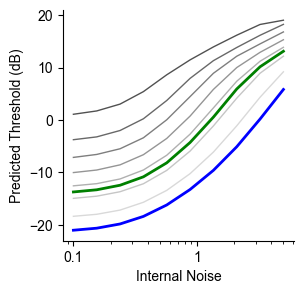

In [6]:
f = plt.figure(1)
f.set_size_inches(3, 3)

sns.lineplot(data=dat[dat["Separability"]=="non"],x="NoiseLevels",y="PredThresh",hue="Model",palette=colors,linewidth=1 )
sns.lineplot(data=dat[dat["Separability"]=="sep"],x="NoiseLevels",y="PredThresh",linewidth=2,color="green")
sns.lineplot(data=dat[dat["Separability"]=="sig"],x="NoiseLevels",y="PredThresh",linewidth=2,color="blue")
plt.xscale("log")
plt.xlabel("Internal Noise", fontsize=10)
plt.ylabel("Predicted Threshold (dB)")
plt.yticks([-20, -10, 0, 10, 20], fontsize=10)
plt.xticks([0.1, 1], [0.1, 1], fontsize=10)
ax = f.axes
ax[0].set_aspect(1.0/ax[0].get_data_ratio(),adjustable='box')
ax[0].get_legend().remove()

sns.despine()

plt.savefig('bayesIdealObserver.pdf', dpi=300, transparent=True, bbox_inches="tight")